<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">covid dataset</h3>
    
</div>

#### i use Id3 and candidate elimination library in project.


In [ ]:
pip install decision-tree-id3

In [43]:
pip install classic-CandidateElimination

#### نصب کتابخانه های مورد نیاز

In [4]:
#Let's Import the Packages...
import pandas as pd
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
import six
import sys
sys.modules['sklearn.externals.six'] = six
from id3 import Id3Estimator
from id3 import export_graphviz
from graphviz import Source
from sklearn import metrics

#### read csv file & sort & remove duplicate 

In [5]:
#Let's Read csv file
df=pd.read_csv("covid.csv")
#Show records of dataframe
df=df.sort_values( 'age',ascending=False)
df.drop_duplicates(inplace=True)
df

,#,age,Sleep_problems,Headache,Diarrhea,Abdominal_pain,body_pain,Body_discoloration,Cough,Fever,Ague,Sore_throat,Fatigue,runny_nose,Chest_pain,Decreased_appetite,Vomit,Nausea,Sneezing,Shortness_of_breath,Loss_of_smell,Loss_of_taste,urticaria
102,103,95,no,yes,yes,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no
100,101,85,yes,yes,yes,yes,yes,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no
11,12,76,yes,yes,no,yes,yes,yes,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no
99,100,76,no,yes,no,yes,yes,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no
468,469,70,yes,no,no,no,yes,no,yes,yes,yes,yes,yes,no,yes,yes,no,no,no,yes,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,241,-,no,no,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,no,no,yes,yes,no
239,240,-,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,yes,no
238,239,-,no,yes,no,no,no,no,no,yes,yes,no,no,no,no,yes,no,no,no,no,no,no,no
237,238,-,no,no,no,no,no,no,yes,yes,no,no,no,no,no,no,no,no,no,no,no,no,no


In [6]:
df.info

<bound method DataFrame.info of        # age Sleep_problems  ... Loss_of_smell Loss_of_taste urticaria
102  103  95             no  ...            no            no        no
100  101  85            yes  ...            no            no        no
11    12  76            yes  ...            no            no        no
99   100  76             no  ...            no            no        no
468  469  70            yes  ...            no            no        no
..   ...  ..            ...  ...           ...           ...       ...
240  241   -             no  ...           yes           yes        no
239  240   -             no  ...           yes           yes        no
238  239   -             no  ...            no            no        no
237  238   -             no  ...            no            no        no
243  244   -             no  ...            no            no        no

[487 rows x 23 columns]>

#### .در این بخش می خواهیم بفهمیم که در هر ستون چه تعداد، مقادیر گم شده وجود دارد

In [7]:
df.replace('-',np.nan,inplace=True)
df.isnull().sum()

#                        0
age                    359
Sleep_problems           0
Headache                 1
Diarrhea                 0
Abdominal_pain           0
body_pain                0
Body_discoloration       0
Cough                    0
Fever                    0
Ague                     0
Sore_throat              0
Fatigue                  0
runny_nose               0
Chest_pain               0
Decreased_appetite       0
Vomit                    0
Nausea                   0
Sneezing                 0
Shortness_of_breath      0
Loss_of_smell            0
Loss_of_taste            0
urticaria                0
dtype: int64

برای نرمالسازی دیتاست چون بیشتراز  73 درصد از ستون سن مقدار گمشده دارد، این  ستون راحذف می کنیم و همچنین سطری که در آن مقدار ستون "سردرد" مقداردهی نشده است نیز حذف می شود

In [8]:
df=df.drop(["#","age"],1)
df=df.dropna(axis=0)

In [58]:
df.isnull().sum()

Sleep_problems         0
Headache               0
Diarrhea               0
Abdominal_pain         0
body_pain              0
Body_discoloration     0
Cough                  0
Fever                  0
Ague                   0
Sore_throat            0
Fatigue                0
runny_nose             0
Chest_pain             0
Decreased_appetite     0
Vomit                  0
Nausea                 0
Sneezing               0
Shortness_of_breath    0
Loss_of_smell          0
Loss_of_taste          0
urticaria              0
target                 0
dtype: int64

# Indexing and Selecting data

### تولید نمونه های با برچسب منفی به صورت تصادفی و تبدیل مقادیر ستون ها به صفر و یک

نمونه های موجود در دیتاست کویید به عنوان داده های مثبت در نظر گرفته شده اند و نمونه های منفی به طور تصادفی ایجاد شده اند

In [10]:
new_df = pd.DataFrame()
for j in df.columns:
    a=list(df[j].copy())
    for i in range(486) :
        if a[i]== 'yes':
            a[i]=1
        else:
            a[i]=0
    new_df[j]=a
l=list(new_df.values)

while len(l)<972:
    row=random.randint(2, size=(21))
    for i in l:
        if list(i)==list(row):
            break
    else:
        l.append(row)
            
        
dataset=np.array(l)
dataset.shape

(972, 21)

* now we have 972 rows & 21 attributes

In [11]:
target= np.concatenate((np.ones(486), np.zeros(486)))
target.shape

(972,)

# k-mens

In [13]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(dataset)
y_kmeans = kmeans.predict(dataset)


# Logistic Regression Algorithm

مشخص کردن بخش آموزش و تست

In [14]:
X_train, X_test, y_train, y_test = train_test_split(dataset, target, test_size=0.1)

In [15]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [16]:
y_pred = logreg.predict(X_test)

#### accurecy precision recall  

In [17]:
print('The accuracy of Logistic Regression is: ', (metrics.accuracy_score(y_test, y_pred)))

The accuracy of Logistic Regression is:  0.9795918367346939


In [18]:
print('The recall of Logistic Regression is: ', (metrics.recall_score(y_test, y_pred)))

The recall of Logistic Regression is:  1.0


In [19]:
print('The precision of Logistic Regression is: ', (metrics.precision_score(y_test, y_pred)))

The precision of Logistic Regression is:  0.9629629629629629


# یافتن ویژگی های کم اهمیت 

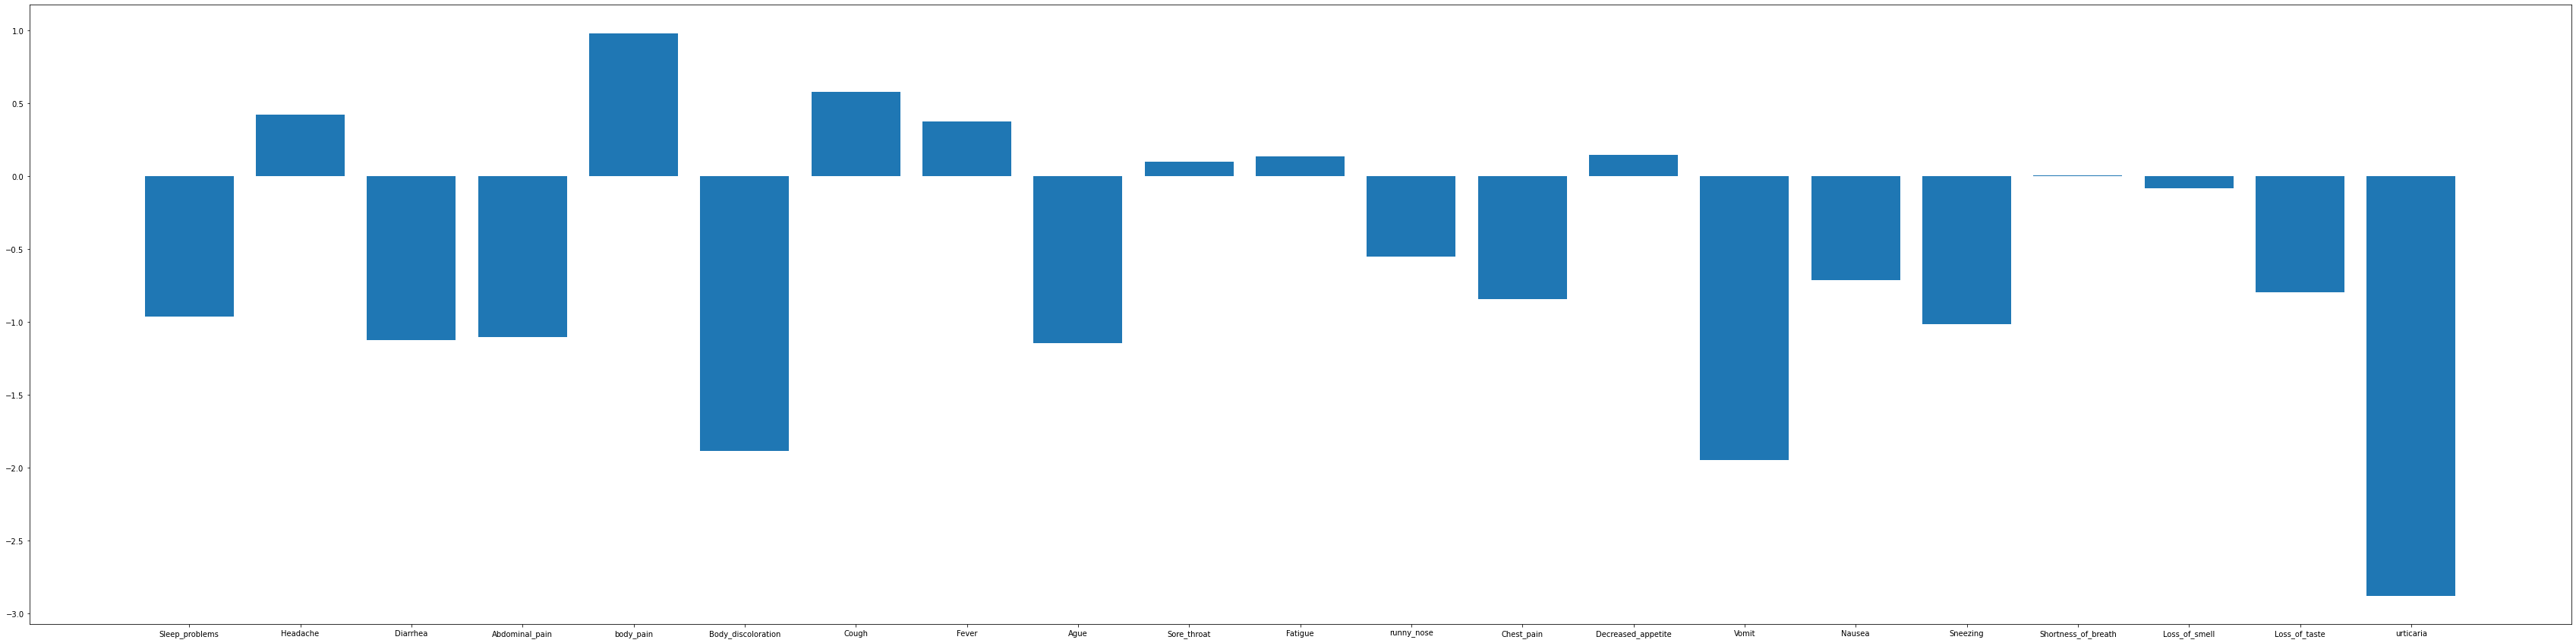

In [60]:
importance = logreg.coef_[0]
plt.figure(figsize=(60,15)) 
plt.bar(new_df.columns, importance) 
plt.show()

# KNN Algorithm

In [21]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


#### accuracy precision recall 

In [22]:
knn.score(X_train, y_train)

0.9496567505720824

In [23]:
print('The recall of knn is: ', (metrics.recall_score(y_test, y_pred)))

The recall of knn is:  1.0


In [24]:
print('The precision of knn is: ', (metrics.precision_score(y_test, y_pred)))

The precision of knn is:  0.8666666666666667


In [25]:
error_rate = []
# Might take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

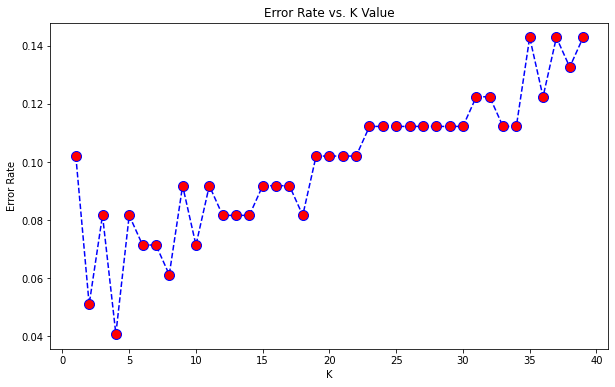

In [26]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# DecisionTree Algorithm

In [27]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [28]:
y_pred = classifier.predict(X_test)

#### accuracy precision recall 

In [29]:
print('The accuracy of DT is: ', (metrics.accuracy_score(y_test, y_pred)))

The accuracy of DT is:  0.9081632653061225


In [30]:
print('The recall of DT is: ', (metrics.recall_score(y_test, y_pred)))

The recall of DT is:  0.9807692307692307


In [31]:
print('The Precision of DT is: ', (metrics.precision_score(y_test, y_pred)))

The Precision of DT is:  0.864406779661017


# Naive Bayes

In [61]:
nb = GaussianNB()
nb.fit(X_train, y_train)
print("Naive Bayes test accuracy: ", nb.score(X_test, y_test))

Naive Bayes test accuracy:  0.9489795918367347


In [62]:
y_train

array([0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0.,
       1., 0., 1., 0., 1.

# Id3 Algorithm

In [53]:
estimator = Id3Estimator()

In [54]:
estimator.fit(X_train, y_train)

Id3Estimator()

In [55]:
y_pred=estimator.predict(X_test)

In [56]:
print('The accuracy of id3 is: ', (metrics.accuracy_score(y_test, y_pred)))
print('The recall of id3 is: ', (metrics.recall_score(y_test, y_pred)))
print('The Precision of id3 is: ', (metrics.precision_score(y_test, y_pred)))

The accuracy of id3 is:  0.9285714285714286
The recall of id3 is:  0.9807692307692307
The Precision of id3 is:  0.8947368421052632


In [57]:
export_graphviz(estimator.tree_, 'tree.dot', new_df.columns)


<_io.TextIOWrapper name='tree.dot' mode='w' encoding='utf8'>

# Candidate Elimination

In [44]:
from classic_CandidateElimination import Candidate_Elimination
ce = Candidate_Elimination()
ce.fit(X_train, y_train)

Initial Specific Hypothesis :  [0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1]
Initial General Hypothesis :  [['?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?']]
Final Specific Hypothesis :  ['?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?']
Final General Hypothesis :  [['?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?']]
Final Version Space :  [['?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?']]
434   440


1

In [51]:
y_pred=ce.predict(X_test)

In [52]:
print('The accuracy of ce is: ', (metrics.accuracy_score(y_test, y_pred)))
print('The recall of ce is: ', (metrics.recall_score(y_test, y_pred)))
print('The Precision of ce is: ', (metrics.precision_score(y_test, y_pred)))

The accuracy of ce is:  0.46938775510204084
The recall of ce is:  0.0
The Precision of ce is:  0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Find_s Algorithm

In [47]:
def train(c,t):
    for i, val in enumerate(t):
        if val == 1:
            specific_hypothesis = c[i].copy()
            break
             
    for i, val in enumerate(c):
        if t[i] == 1:
            for x in range(len(specific_hypothesis)):
                if val[x] != specific_hypothesis[x]:
                    specific_hypothesis[x] = -1
                else:
                    pass
                 
    return specific_hypothesis
 
#obtaining the final hypothesis
print("n The final hypothesis is:",train(X_train, y_train))

n The final hypothesis is: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


# ذخیره دیتاست نهایی در فایل

In [48]:
df = pd.DataFrame(dataset, columns =new_df.columns )

In [49]:
df["target"]=target

In [50]:
df.to_csv("data.csv")